In [1]:
#import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [3]:
#load the dataset

df=pd.read_csv("/kaggle/input/labsheet-2/headbrain (1).csv")

In [4]:
# Display the first few rows of the dataframe

df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**df.head(): Displays the first five rows of the DataFrame, providing an initial look at the data.**

In [5]:
# Display the last few rows of the dataframe
df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


**df.tail(): Displays the last five rows of the DataFrame, providing an initial look at the data.**

In [6]:
df.shape

(237, 4)

In [7]:
#Check for any missing values in the dataset
##df.isnull(): Checks for missing values in each column.

df.isnull()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
232,False,False,False,False
233,False,False,False,False
234,False,False,False,False
235,False,False,False,False


In [8]:
#Check for any missing values in the dataset
##df.isnull().sum(): Checks for missing values in each column and sums them up.
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [9]:
#Display the summary statistics of the dataset
##df.describe(): Provides a summary of statistics for each numerical column in the DataFrame.
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

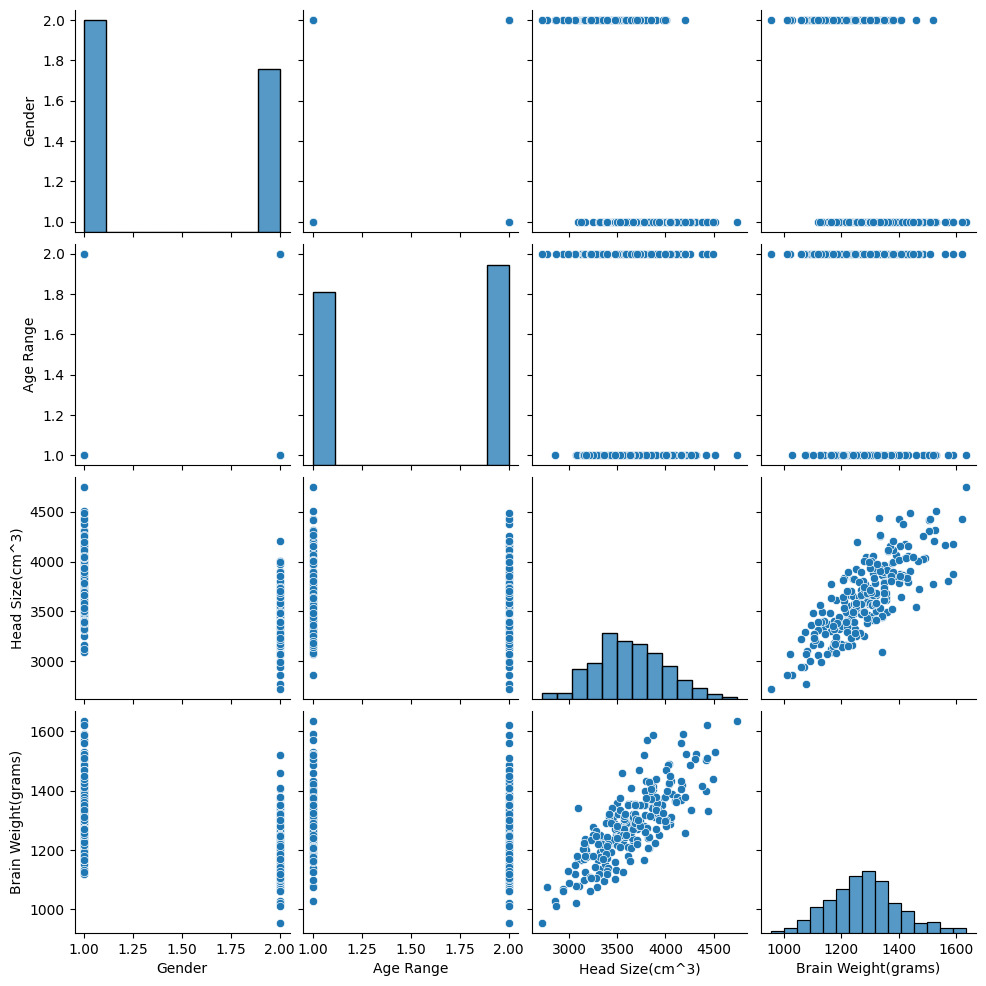

In [11]:
sns.pairplot(df)

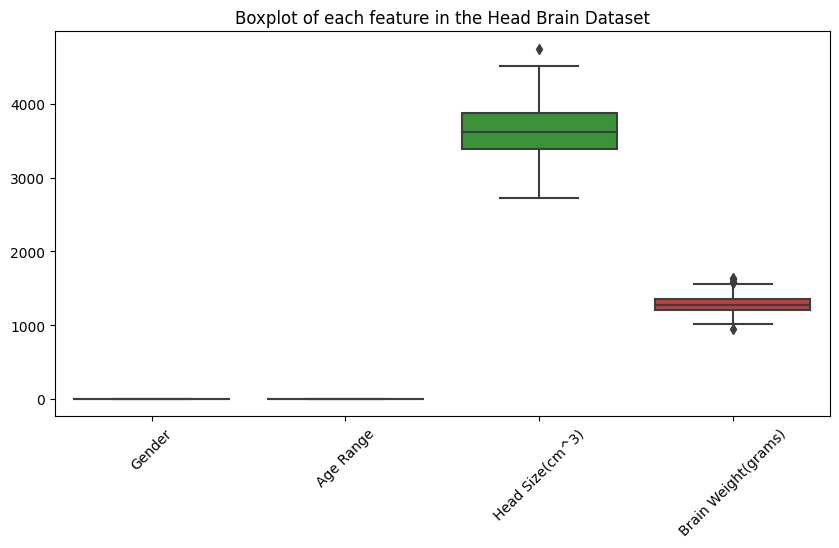

In [12]:
#plot boxplots for each feature in the dataset
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.title('Boxplot of each feature in the Head Brain Dataset')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


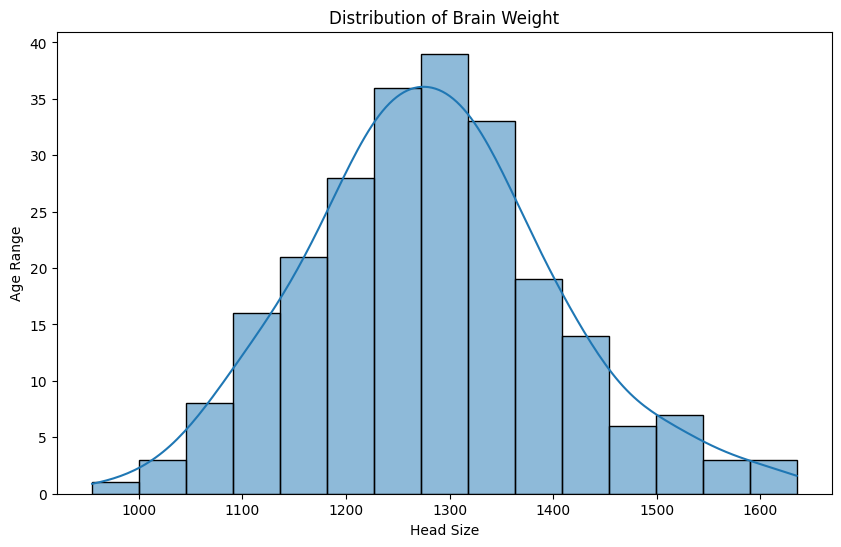

In [13]:
#Visualize the distribution of the target variable (Brain Weight)
##sns.histplot(): Plots a histogram for the target variable 'Brain Weight' (Median Value of Owner-Occupied Homes).
##kde=True: Adds a Kernel Density Estimate (KDE) line to the histogram for visualizing the data distribution.
plt.figure(figsize=(10,6))
sns.histplot(df['Brain Weight(grams)'],kde=True)
plt.title('Distribution of Brain Weight')
plt.xlabel('Head Size')
plt.ylabel('Age Range')
plt.show()

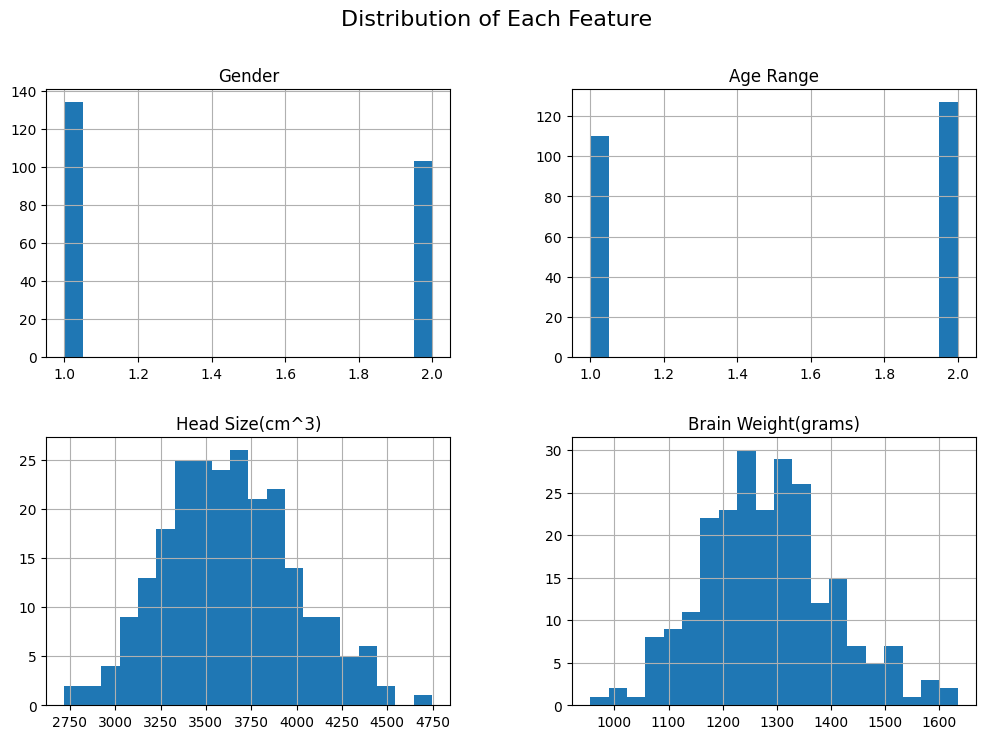

In [14]:
# Plot histograms for each feature
df.hist(figsize=(12,8),bins=20)
plt.suptitle('Distribution of Each Feature',fontsize=16)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


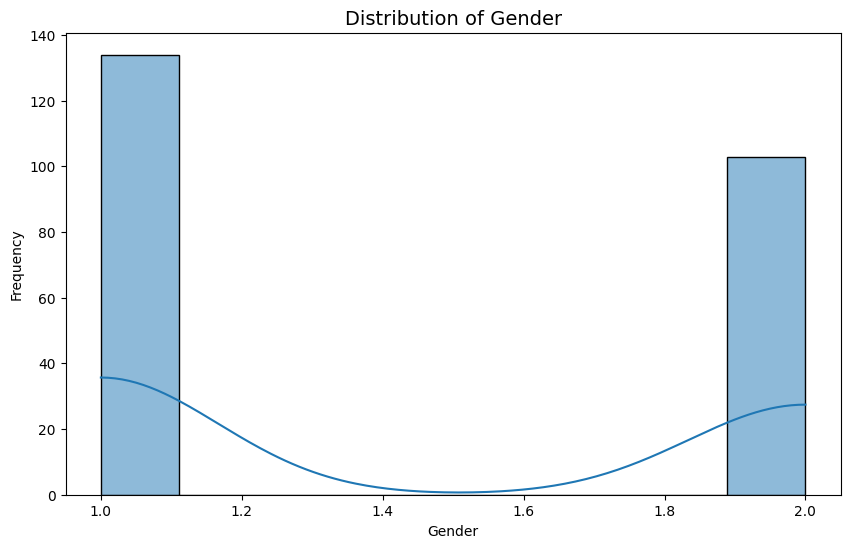

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


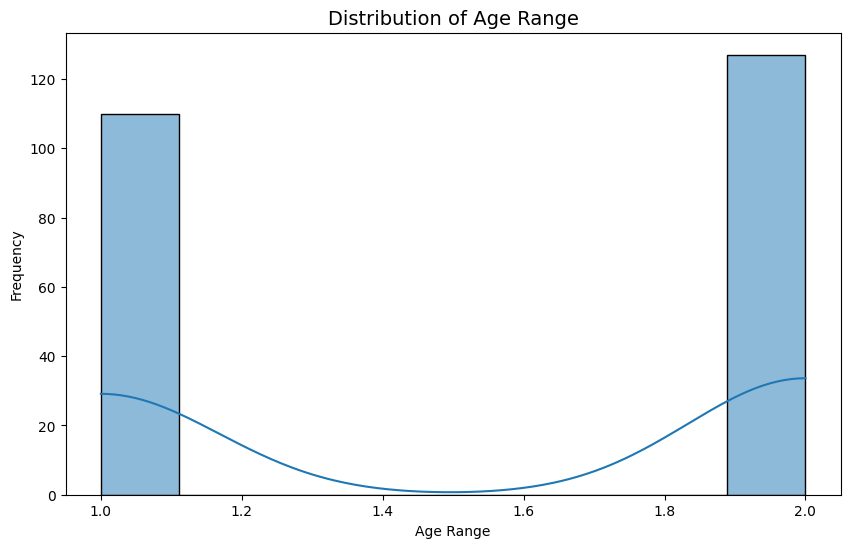

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


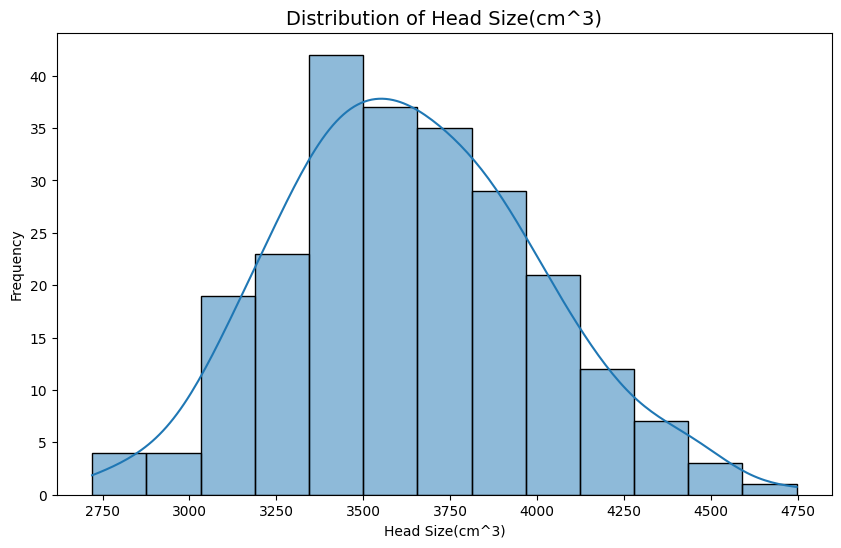

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


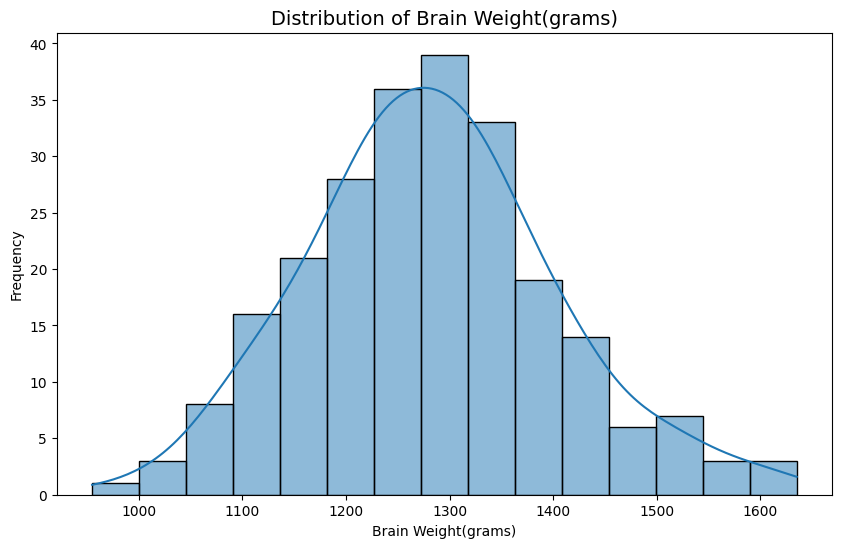

In [15]:
# Plot distribution plots with KDE for each feature
for column in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column],kde=True)
    plt.title(f'Distribution of {column}',fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Head Size(cm^3)', ylabel='Brain Weight(grams)'>

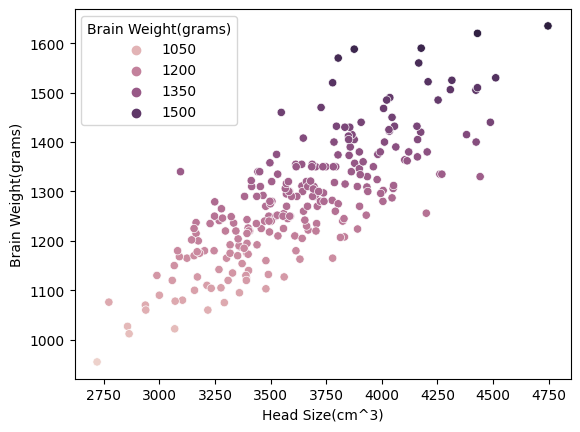

In [16]:
sns.scatterplot(x='Head Size(cm^3)',y='Brain Weight(grams)',hue='Brain Weight(grams)',data=df)

In [23]:
#Calculate the correlation matrix
##df.corr(): Computes the correlation matrix for the DataFrame, showing the correlation coefficients between variables.
tc=df.corr()

In [24]:
tc

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


<Axes: >

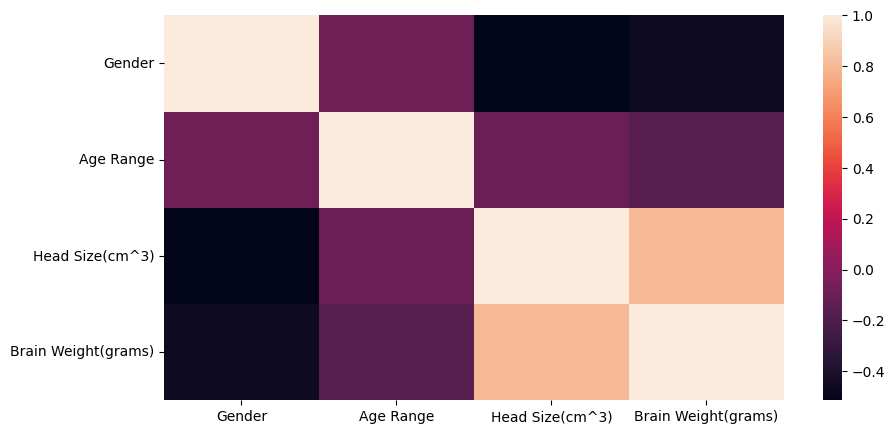

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(tc)

<Axes: >

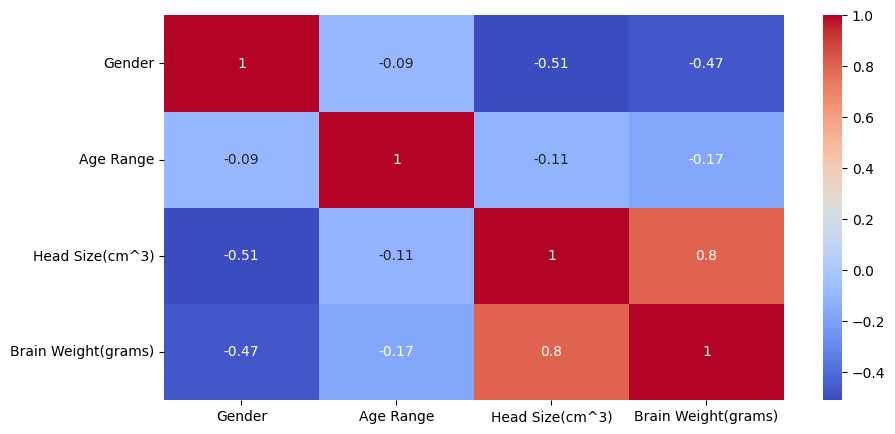

In [26]:
#Visualize the correlation matrix using a heatmap
##sns.heatmap(): Creates a heatmap to visualize the correlation matrix.
##annot=True: Displays the correlation coefficient values in the heatmap.
##cmap='coolwarm': Sets the color map for the heatmap.
plt.figure(figsize=(10,5))
tc=df.corr().round(2)
sns.heatmap(tc,annot=True,cmap='coolwarm')

In [ ]:
#Select the features and the target variable
#df.drop(): Removes the target variable 'Brain Weight' from the features DataFrame X.
#df['Brain Weight(grams)']: Selects the target variable y.

# Select the features and the target variable
X=df.drop('Brain Weight(grams)',axis=1)
y=df['Brain Weight(grams)']

In [29]:
#Select the features and the target variable
#df.drop(): Removes the target variable 'Brain Weight' from the features DataFrame X.
#df['Brain Weight(grams)']: Selects the target variable y.

# Select the features and the target variable
X=df.drop('Brain Weight(grams)',axis=1)
y=df['Brain Weight(grams)']

In [27]:
# Identify and list the features with the highest positive and negative correlation with the target variable
target_correlation = tc['Brain Weight(grams)'].sort_values(ascending=False)

top_positive_correlations = target_correlation.head()

top_negative_correlations = target_correlation.tail()

print(" Positive Correlations:\n", top_positive_correlations)
print("\n Negative Correlations:\n", top_negative_correlations)

 Positive Correlations:
 Brain Weight(grams)    1.00
Head Size(cm^3)        0.80
Age Range             -0.17
Gender                -0.47
Name: Brain Weight(grams), dtype: float64

 Negative Correlations:
 Brain Weight(grams)    1.00
Head Size(cm^3)        0.80
Age Range             -0.17
Gender                -0.47
Name: Brain Weight(grams), dtype: float64


# Prepare the data for training the Linear Regression model

In [32]:
#Split the dataset into training and testing sets

##train_test_split(): Splits the data into training and testing sets.
##test_size=0.2: Allocates 20% of the data for testing and 80% for training.
##random_state=42: Ensures reproducibility of the split.
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Select the features and the target variable
#df.drop(): Removes the target variable 'Brain Weight' from the features DataFrame X.
#df['Brain Weight(grams)']: Selects the target variable y.

# Select the features and the target variable
X=df.drop('Brain Weight(grams)',axis=1)
y=df['Brain Weight(grams)']

**df.drop():** Removes the target variable 'MEDV' from the features DataFrame X.
**df['Brain Weight(grams)']:** Selects the target variable y.

In [33]:
#Split the dataset into training and testing sets

##train_test_split(): Splits the data into training and testing sets.
##test_size=0.2: Allocates 20% of the data for testing and 80% for training.
##random_state=42: Ensures reproducibility of the split.
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**train_test_split():** Splits the data into training and testing sets.
**test_size=0.2:** Allocates 20% of the data for testing and 80% for training.
**random_state=42: **Ensures reproducibility of the split.

# Standardize the feature variables

In [36]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**StandardScaler():** Standardizes features by removing the mean and scaling to unit variance.
**fit_transform():** Fits the scaler to the training data and transforms it.
**transform(): ** Transforms the testing data using the already fitted scaler.

# Train a Linear Regression model using the training data

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

*In Training,62% Score* 

In [38]:
model.score(X_train,y_train)*100

62.64565800251869

In [39]:
model.score(X_test,y_test)*100

73.45676369778577

In [40]:
# Display the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ -7.18012209 -11.79928219  87.6224021 ]
Intercept: 1281.3227513227514


**model.coef_:** Displays the coefficients of the linear model.
**model.intercept_:** Displays the intercept of the linear model.

> **Predict the House Prices Using the Testing Data**

In [41]:
# Predict the brain weights using the testing data
y_pred = model.predict(X_test)
print(y_pred)

[1242.28994947 1359.42439666 1247.9247648  1215.51057307 1336.86029246
 1163.71797457 1385.70785868 1070.38741752 1260.14286707 1198.5812842
 1376.96115705 1202.64725323 1337.35620684 1274.45618401 1265.84588242
 1255.77829168 1575.39510821 1275.69596996 1195.17808357 1495.30493619
 1203.78838517 1217.49423058 1259.18149231 1161.88362024 1252.05893385
 1170.56212185 1269.34773705 1473.13809236 1216.25444463 1495.056979
 1379.16231776 1286.95269747 1191.39052572 1165.7698321  1473.13809236
 1333.29023781 1239.59287438 1120.72272688 1213.52691556 1380.65006089
 1180.30065224 1398.60163251 1265.44862205 1341.47282504 1284.47312558
 1216.53285581 1225.03160026 1149.30600362]


> **Calculate and Display Performance Metrics**

In [42]:
# Calculate and display the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 54.08968544229676
Mean Squared Error (MSE): 4349.999457297087
Root Mean Squared Error (RMSE): 65.9545256771443


In [44]:
R2_score = model.score(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [45]:
R2_score

-7099899.028849859

> ***Plot Predicted vs. Actual Brain Weights***

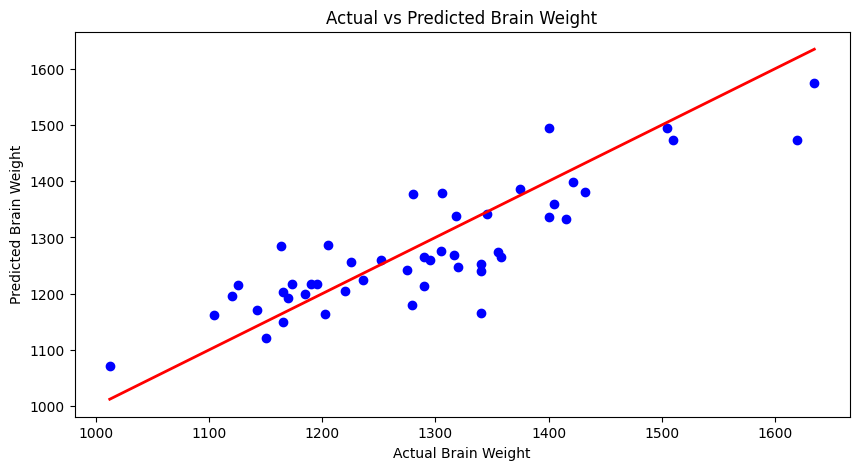

In [46]:
# Plot the predicted vs actual brain weights
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Brain Weight')
plt.ylabel('Predicted Brain Weight')
plt.title('Actual vs Predicted Brain Weight')
plt.show()